In [13]:
# 웹 크롤링에 대한 이해
# 웹 크롤링은 컴퓨터가 유저대신 
# 데이터 열람, 복사, 저장 등의 과정을 진행하는 것이다.
# 예매 매크로 프로그램과 유사한 측면이 있으나 
# 예매 매크로과 완전히 같은 기능은 없다.

# 웹 크롤링엔 크게 정적 크롤링과 동적 크롤링이 있다.

# 정적 크롤링: url로 사이트 접근 시 특별한 작업 없이 원하는 데이터 접근가능
# 예) 다음뉴스, 다음영화 등

# 동적 크롤링: 원하는 데이터 접근 시 유저가 별도의 작업을 해야한다.
# 예) 유튜브, 인스타그램 등

# 정적 크롤링에 사용되는 라이브러리는 BeautifulSoup 이 있고
# 동적 크롤링에 사용되는 라이브러리는 Selenium이 있다.

In [14]:
# *****파싱:
# BeautifulSoup 객체를 생성하려면 HTML 또는 XML 문자열과 
# 파서를 전달해야 합니다. 일반적으로 'html.parser'를 사용합니다.
# 파서 = 데이터를 분석하는 해독기
# 사이트 url을 html_doc변수에 담아서 선언
# 사이트 주소를 요청하는 라이브러리

# 1. 라이브러리 호출
import urllib.request as req
from bs4 import BeautifulSoup

# 2. 원하는 url 주소 담아서 열리는지 확인
url = "http://media.daum.net"
# 위 주소를 열어봐서(다음 서버에 정보요청) 잘 열리는 경우에만 정보열람
res = req.urlopen(url)
source = res.read()

# 3. 한글깨짐 방지
# 한글을 지원하는 유니코드입니다. (한글깨짐 방지 ^^)
source = source.decode('utf-8')

# 4. 데이터 해석 (parsing)
# BeautifulSoup에서 본 사이트는 html문서라는 것을 알려줌
html = BeautifulSoup(source, 'html.parser')
# ***파악한 패턴을 적용하여 원하는 정보를 atags 변수에 저장 합니다.
atags = html.select('a[class=link_txt]')

# 일단 결과를 테스트 출력
# atags 변수에 원하는 데이터가 있음을 확인
# print(atags, len(atags))


# 뉴스 내용만 수집하려면?
# result_data 변수에 빈 리스트 자료구조를 선언 (문자열 데이터 만을 추출하면 된다.)
result_data = []

cnt = 0 # 총 뉴스 헤드라인의 개수도 세고싶어서 cnt 변수 선언
# 크롤링한 전체 데이터에서 개별 데이터 호출
# for문으로 크롤링 데이터 셋에서 개별문장 하나씩 호출
for ii in atags:
    cnt += 1
    # 데이터를 문자열로 변환 (전체 문장에서 문자열 데이터만 추출함)
    atag_str = str(ii.string)
    # 걸러진 문자열 데이터를 준비한 리스트 자료구조에 담습니다
    result_data.append(atag_str.strip()) # 문장좌우에 불필요한 여백은 strip으로 제거

print(result_data, cnt)


["[단독] '마크 곤잘레스' 덕에 年 400억씩 벌었는데…날벼락", '대구 아파트 공사장서 50대 인부 낙하물에 맞아 숨져', "[단독] 초교 20m 앞 '성인 페스티벌' 논란에 교육 당국 칼 빼들었다", '“의대 정원 늘려도, 가르칠 인원이 없다”… 30년 해부학 가르친 교수의 한탄', "'자필 계약서'면 끝?…허경영의 이상한 부동산 거래", '중국 방문한 애플·마이크론 CEO 잇따라 선물보따리...“中 투자 확대”', "허영인 SPC회장 '민노총 노조 파괴'등 혐의 검찰 출석", '중소기업 파산 신청 40% 증가…대출 잔액 사상 최대', '소송하고 거래 끊고… 75년 동업 고려아연·영풍 “이젠 경쟁자”', '경기 띄우기 급급한 中, 좋은 성적만 골라 ‘깜짝 공개’… 역효과 지적도', '[Why] “샤넬 웃고 구찌 울고”… 명품 희비 엇갈리는 이유', '[줌인] “전 세계가 우리의 적”...모스크바 테러 배후 IS', '영어유치원 계속 늘어 840개 돌파…사교육비 월 121만원', "[르포] '시장과 다르네'…출근길 인사 한동훈 향한 차가운 시선", "출국 논란·정권 심판론 부각 수도권 판세 '출렁'…경기 초접전지역은?", '녹색정의당 "4⋅10 총선, 21대와 같은 6석 목표"', '빨간운동화 조여 맨 부산 국힘 후보들 "18석 압승, 제2의 건국전쟁"', 'MB, 천안함묘역 참배 "이념대립·분열 극심, 국민화합 이끌어야"', '충남 홍성서 경운기와 카니발 승합차 추돌… 7명 중경상', '尹 "민생과제…국민 체감하도록 정책 추진속도 높일 것"', "[스프] 잠시 찾아왔다가 금방 사라진 '복지국가' 미국, 그리고 지금은?", '[영상]‘테러 자처’ IS 호라산…왜 러시아 심장부 노렸나 [세모금]', '[아침신문 솎아보기] 경향신문 "尹 \'의사·정부 중재\' 한동훈 띄우기"', '[긴급인터뷰]조규홍 장관 "의료공백 최소화가 중요…전공의 면허 처분 유연하게"', '청소년 자녀의 머리 냄새 원인, 알고 보니… [달콤한 사이언스]', '“벚꽃을 보며 건강트레킹을

In [15]:
# 텍스트 전처리
# 뉴스 데이터 자체는 불필요한 특수기호, 따옴표, 부적절한 띄어쓰기 등으로
# 자연어 데이터가 일관성이 떨어진다.
# 즉, 단어를 세서 키워드 분석 등의 자연어 처리 작업이 불가 하므로
# 문자데이터를 전처리 하여 데이터 클리닝을 진행하여야 한다.


# 텍스트 전처리 순서
# 1. 텍스트 전처리 관련 (정규 표현식) 라이브러리 호출
import re

# 2. 텍스트 전처리 함수 만들기
# 함수에서 입력값을 받아서 처리하겠다는 의미로 괄호안에 input_data라는 변수 선언
def clean_text(ㅋㅋㅋ):
    # 문장부호 제거기능 추가 (sub라는 명령어는 교체한다는 의미)
    text_string_re1 = re.sub('[,.?!:\'\";]', '', ㅋㅋㅋ)
    # 특수문자 제거기능 추가
    text_string_re2 = re.sub('[!@#$%^&*()]|[0-9]', '', text_string_re1)
    # 영문 대,소문자 --> 영문 소문자로 통일 (소문자 변환 lower함수 사용)
    text_string_re3 = text_string_re2.lower()
    # 통일된 영문 데이터를 없애기
    text_string_re4 = re.sub('[a-z]', '', text_string_re3)
    # 불필요한 공백제거 
    # (split함수 통해서 단어마다 별도의 데이터로 인식 후, 불필요한 여백제거)
    text_string_re5 = ' '.join(text_string_re4.split())
    return text_string_re5

# 텍스트 함수 사용
# 전처리 후 깨끗해진 단어 데이터를 넣을 리스트 자료형 데이터셋을 선언합니다.
clean_text2 = []
# 이전의 결과 셋에서 개별 데이터를 호출해서 
# clean_text함수에 넣고 데이터 전처리
for jj in result_data:
    clean_text2.append(clean_text(jj))

# clean_text2 = [clean_text(jj) for jj in result_data]

print("저희 결과는")
print(clean_text2) 


저희 결과는
['[단독] 마크 곤잘레스 덕에 年 억씩 벌었는데…날벼락', '대구 아파트 공사장서 대 인부 낙하물에 맞아 숨져', '[단독] 초교 앞 성인 페스티벌 논란에 교육 당국 칼 빼들었다', '“의대 정원 늘려도 가르칠 인원이 없다”… 년 해부학 가르친 교수의 한탄', '자필 계약서면 끝…허경영의 이상한 부동산 거래', '중국 방문한 애플·마이크론 잇따라 선물보따리“中 투자 확대”', '허영인 회장 민노총 노조 파괴등 혐의 검찰 출석', '중소기업 파산 신청 증가…대출 잔액 사상 최대', '소송하고 거래 끊고… 년 동업 고려아연·영풍 “이젠 경쟁자”', '경기 띄우기 급급한 中 좋은 성적만 골라 ‘깜짝 공개’… 역효과 지적도', '[] “샤넬 웃고 구찌 울고”… 명품 희비 엇갈리는 이유', '[줌인] “전 세계가 우리의 적”모스크바 테러 배후', '영어유치원 계속 늘어 개 돌파…사교육비 월 만원', '[르포] 시장과 다르네…출근길 인사 한동훈 향한 차가운 시선', '출국 논란·정권 심판론 부각 수도권 판세 출렁…경기 초접전지역은', '녹색정의당 ⋅ 총선 대와 같은 석 목표', '빨간운동화 조여 맨 부산 국힘 후보들 석 압승 제의 건국전쟁', '천안함묘역 참배 이념대립·분열 극심 국민화합 이끌어야', '충남 홍성서 경운기와 카니발 승합차 추돌… 명 중경상', '尹 민생과제…국민 체감하도록 정책 추진속도 높일 것', '[스프] 잠시 찾아왔다가 금방 사라진 복지국가 미국 그리고 지금은', '[영상]‘테러 자처’ 호라산…왜 러시아 심장부 노렸나 [세모금]', '[아침신문 솎아보기] 경향신문 尹 의사·정부 중재 한동훈 띄우기', '[긴급인터뷰]조규홍 장관 의료공백 최소화가 중요…전공의 면허 처분 유연하게', '청소년 자녀의 머리 냄새 원인 알고 보니… [달콤한 사이언스]', '“벚꽃을 보며 건강트레킹을 즐겨요”…리솜리조트 월 ‘블루밍 리솜’ 진행', '이재명 中에 그냥 셰셰하면 된다한동훈 굴종 인식 [녹취록]', '[지금은 기후위기] 치솟는 해수면…킬링 커브 되나

In [16]:
# 단어의 빈도파악 (단어 수 세기)

# 단어 수 셀 때 딕셔너리 자료구조가 필요하다. 
# 왜? key와 value로 단어와 단어 개수를 표시해야 하므로
word_count = {}

# 단어 수 셀 때 주의사항: 
# 각 문장안에 단어가 있으므로 2중 for문 구조가 필요
# 바깥 for문이 개별 문장이고, 
# 안쪽 for문이 그 문장 안에 단어이다.

#  전처리 데이터셋 에서 text라는 이름으로 문장 하나씩 끄집어 냄
for text in clean_text2:
    # 끄집어낸 문장에서 단어 하나씩 추출
    # split함수가 없으면 단어의 글자로 전부 세버린다. split을 써야
    # 문장 안에서 단어로 인식 가능 
    for word in text.split(): 
        # 딕셔너리 자료구조에서 단어를 key값으로 놓고
        # get함수를 이용해서 같은 데이터가 들올 때마다 1씩 증가
        word_count[word] = word_count.get(word, 0) + 1

print(word_count)

{'[단독]': 2, '마크': 1, '곤잘레스': 1, '덕에': 1, '年': 1, '억씩': 1, '벌었는데…날벼락': 1, '대구': 1, '아파트': 1, '공사장서': 1, '대': 1, '인부': 1, '낙하물에': 1, '맞아': 1, '숨져': 1, '초교': 1, '앞': 1, '성인': 1, '페스티벌': 1, '논란에': 1, '교육': 1, '당국': 1, '칼': 1, '빼들었다': 1, '“의대': 1, '정원': 1, '늘려도': 1, '가르칠': 1, '인원이': 1, '없다”…': 1, '년': 2, '해부학': 1, '가르친': 1, '교수의': 1, '한탄': 1, '자필': 1, '계약서면': 1, '끝…허경영의': 1, '이상한': 1, '부동산': 1, '거래': 2, '중국': 1, '방문한': 2, '애플·마이크론': 1, '잇따라': 1, '선물보따리“中': 1, '투자': 1, '확대”': 1, '허영인': 1, '회장': 1, '민노총': 1, '노조': 1, '파괴등': 1, '혐의': 1, '검찰': 1, '출석': 1, '중소기업': 1, '파산': 1, '신청': 1, '증가…대출': 1, '잔액': 1, '사상': 1, '최대': 1, '소송하고': 1, '끊고…': 1, '동업': 1, '고려아연·영풍': 1, '“이젠': 1, '경쟁자”': 1, '경기': 1, '띄우기': 2, '급급한': 1, '中': 1, '좋은': 1, '성적만': 1, '골라': 1, '‘깜짝': 1, '공개’…': 1, '역효과': 1, '지적도': 1, '[]': 1, '“샤넬': 1, '웃고': 1, '구찌': 1, '울고”…': 1, '명품': 1, '희비': 1, '엇갈리는': 1, '이유': 1, '[줌인]': 1, '“전': 1, '세계가': 1, '우리의': 1, '적”모스크바': 1, '테러': 1, '배후': 1, '영어유치원': 1, '계속': 1, '늘어': 1, '개': 1, '돌파…사교육비': 1,

In [17]:
# 단어 전처리 (글자데이터에 의미부여)
# 2회이상 출현단어 + 2~4자 단어만 선정

new_word_count = {}
# 딕셔너리 구조의 items함수 이용해서 단어의 빈도수와 단어정보를
# 동시에 접근 하였고 개별 원소에서 변수 2개 설정 (word, cnt)
for word, cnt in word_count.items():
    # 2회 이상출현 & 단어 글자 수 2~4글자 사이
    if cnt >=2 and len(word) >= 2 and len(word) <=4:
        print(word, "->", word_count[word])
        # 딕셔너리 자료구조에서 단어를 key값으로 놓고
        # get함수를 이용해서 같은 데이터가 들올 때마다 1씩 증가
        new_word_count[word] = new_word_count.get(word, cnt)

print(new_word_count)

[단독] -> 2
거래 -> 2
방문한 -> 2
띄우기 -> 2
한동훈 -> 2
장관 -> 2
{'[단독]': 2, '거래': 2, '방문한': 2, '띄우기': 2, '한동훈': 2, '장관': 2}


In [18]:
# 통계자료 작성

from collections import Counter 
# 상위 몇위 등의 통계를 만드는 Counter라는 라이브러리에 데이터 입력
count_result = Counter(new_word_count)
# 단어 빈도 수 기준, 상위 5단어를 뽑아서 top5_word 변수에 저장
top5_word = count_result.most_common(5)
print(top5_word)




[('[단독]', 2), ('거래', 2), ('방문한', 2), ('띄우기', 2), ('한동훈', 2)]


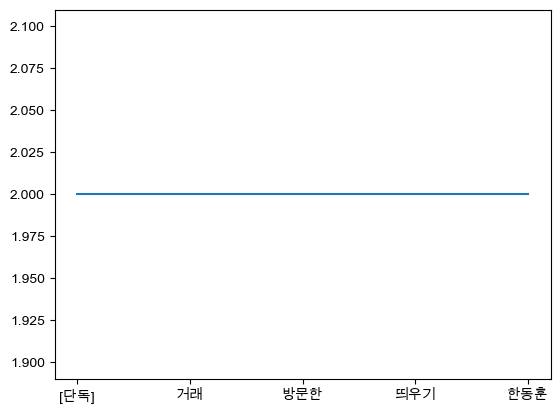

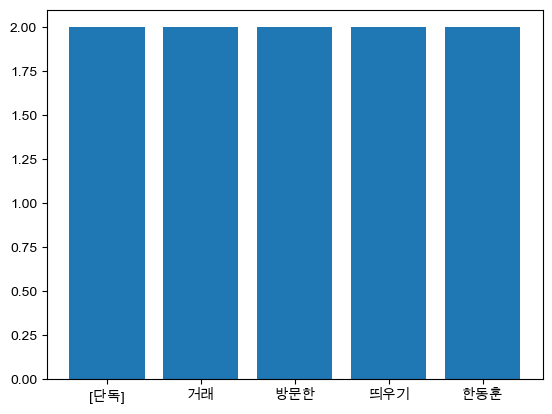

In [19]:
import matplotlib.pyplot as plt

# 폰트 설정
plt.rcParams['font.family'] = 'Arial Unicode MS'  
plt.rcParams['axes.unicode_minus'] = False

# 그래프 데이터
words = []
counts = []

for word, count in top5_word:
    words.append(word)
    counts.append(count)

# 선그래프 그리기
plt.plot(words, counts)
plt.show()

# 막대그래프 그리기
plt.bar(words, counts)
plt.show()
